# Stock Prediction in Python
<img src="https://u.osu.edu/duska.7/files/2017/04/stock-market-3-21gyd1b.jpg">
<br> <br>
<li> For predicting Stocks, we are using the <b>LSTM </b> Technique </li>

In [1]:
#Downloading Modules
!pip install numpy
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install --ignore-installed --upgrade tensorflow
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached protobuf-3.19.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2011-01-01'
end = '2021-01-01'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033263
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085626
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168127
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159911
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.232667


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.404572
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.068588
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.270172
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.133835
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.116043


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033263
1,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085626
2,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168127
3,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159911
4,2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.232667


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,11.795000,11.601429,11.630000,11.770357,445138400.0
1,11.875000,11.719643,11.872857,11.831786,309080800.0
2,11.940714,11.767857,11.769643,11.928571,255519600.0
3,11.973214,11.889286,11.954286,11.918929,300428800.0
4,12.012500,11.853571,11.928214,12.004286,311931200.0


In [7]:
df.tail()

,High,Low,Open,Close,Volume
2512,133.460007,131.100006,131.320007,131.970001,54930100.0
2513,137.339996,133.509995,133.990005,136.690002,124486200.0
2514,138.789993,134.339996,138.050003,134.869995,121047300.0
2515,135.990005,133.399994,135.580002,133.720001,96452100.0
2516,134.740005,131.720001,134.080002,132.690002,99116600.0


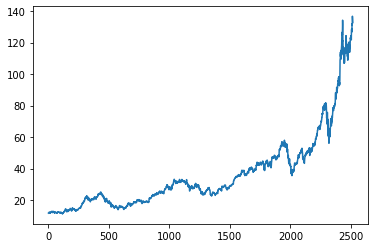

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
0,11.795000,11.601429,11.630000,11.770357,445138400.0
1,11.875000,11.719643,11.872857,11.831786,309080800.0
2,11.940714,11.767857,11.769643,11.928571,255519600.0
3,11.973214,11.889286,11.954286,11.918929,300428800.0
4,12.012500,11.853571,11.928214,12.004286,311931200.0
...,...,...,...,...,...
2512,133.460007,131.100006,131.320007,131.970001,54930100.0
2513,137.339996,133.509995,133.990005,136.690002,124486200.0
2514,138.789993,134.339996,138.050003,134.869995,121047300.0
2515,135.990005,133.399994,135.580002,133.720001,96452100.0


In [10]:
#moving average 100
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512    118.223525
2513    118.489800
2514    118.699475
2515    118.925550
2516    119.125175
Name: Close, Length: 2517, dtype: float64

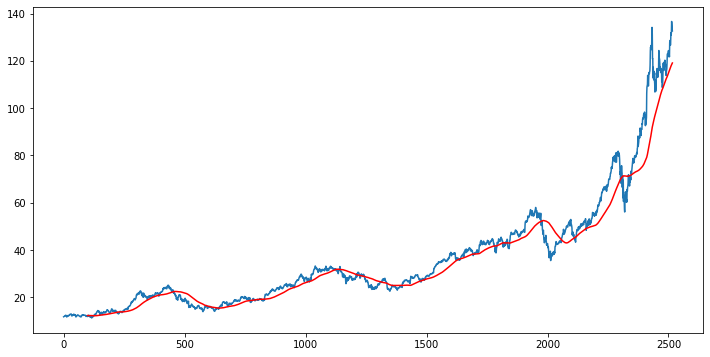

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
#moving average 100
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512     99.158737
2513     99.494725
2514     99.866312
2515    100.218837
2516    100.573950
Name: Close, Length: 2517, dtype: float64

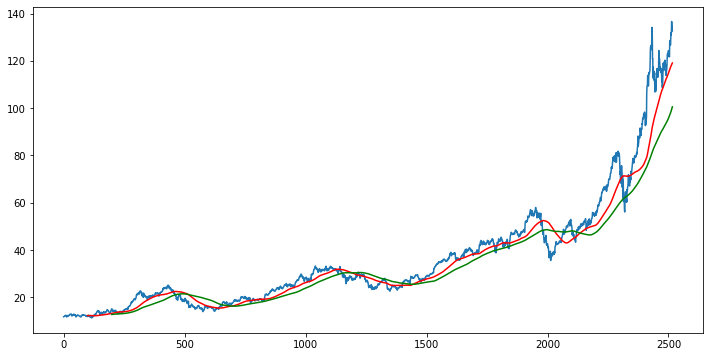

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(2517, 5)

In [15]:
#Spliting data into training and testing
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [16]:
data_training.head()

,Close
0,11.770357
1,11.831786
2,11.928571
3,11.918929
4,12.004286


In [17]:
data_testing.head()

,Close
1761,43.064999
1762,43.057499
1763,43.257500
1764,43.750000
1765,43.587502


In [18]:
#Scaling data for LSTM model to work on close values

#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)
print()
print(data_training_array.shape)

[[0.01549552]
 [0.01736587]
 [0.02031271]
 ...
 [0.95569915]
 [0.9593528 ]
 [0.94527085]]

(1761, 1)


In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i, 0]) #append(element, index)

#Converting x_train and y_train into numpy arrays:
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1661, 100, 1)

In [22]:
#Machine Learning Model

#Importing LSTM
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

#Four Layers
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

#Dense Layer
model.add(Dense(units=1))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) #epochs is number of iterations in one cycle

Epoch 1/50
52/52 [==============================] - 37s 484ms/step - loss: 0.0464
Epoch 2/50
52/52 [==============================] - 16s 315ms/step - loss: 0.0090
Epoch 3/50
52/52 [==============================] - 16s 313ms/step - loss: 0.0077
Epoch 4/50
52/52 [==============================] - 16s 312ms/step - loss: 0.0071
Epoch 5/50
52/52 [==============================] - 16s 312ms/step - loss: 0.0076
Epoch 6/50
52/52 [==============================] - 16s 313ms/step - loss: 0.0059
Epoch 7/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0060
Epoch 8/50
52/52 [==============================] - 18s 348ms/step - loss: 0.0075
Epoch 9/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0047
Epoch 10/50
52/52 [==============================] - 16s 313ms/step - loss: 0.0049
Epoch 11/50
52/52 [==============================] - 16s 311ms/step - loss: 0.0048
Epoch 12/50
52/52 [==============================] - 16s 313ms/step - loss: 0.0046
Epoch 13/50
5

In [24]:
model.save('keras_model.h5')

In [25]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

<ipython-input-25-5333abc8927a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,40.264999
1,38.830002
2,39.369999
3,39.962502
4,40.400002


In [26]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0466421 ],
       [0.03245422],
       [0.0377932 ],
       [0.04365129],
       [0.04797687],
       [0.04637021],
       [0.03873248],
       [0.03784264],
       [0.03712585],
       [0.04347825],
       [0.0439726 ],
       [0.04221767],
       [0.043676  ],
       [0.04765553],
       [0.05121487],
       [0.05230245],
       [0.05390908],
       [0.05403268],
       [0.04916331],
       [0.04874311],
       [0.04713645],
       [0.04063574],
       [0.04772968],
       [0.04614776],
       [0.04315691],
       [0.03977061],
       [0.04372544],
       [0.0407346 ],
       [0.0408829 ],
       [0.03430804],
       [0.02768371],
       [0.02397607],
       [0.02066392],
       [0.02706577],
       [0.02975997],
       [0.02741181],
       [0.02948808],
       [0.02872184],
       [0.03037791],
       [0.02790615],
       [0.03262723],
       [0.03240478],
       [0.03373951],
       [0.03388781],
       [0.03549448],
       [0.034135  ],
       [0.03658206],
       [0.043

In [27]:
input_data.shape

(856, 1)

In [28]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i,0])

#Converting x_test and y_test into numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [29]:
#Making Predictions
y_pred = model.predict(x_test)
y_pred.shape

24/24 [==============================] - 3s 93ms/step


(756, 1)

In [30]:
scaler.scale_

array([0.00988704])

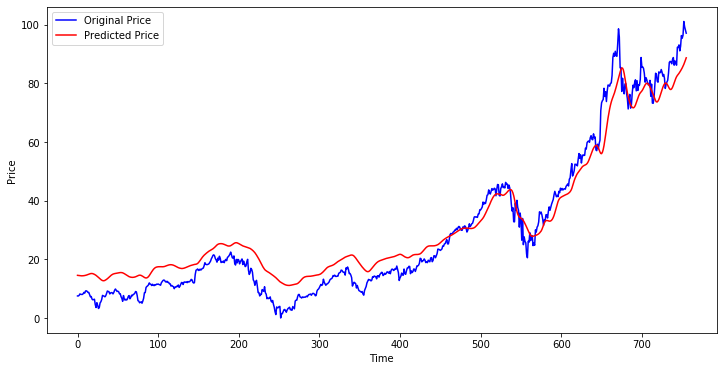

In [31]:
scale_factor = 1/0.00988704
y_pred *= scale_factor
y_test *= scale_factor 

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()